<a href="https://colab.research.google.com/github/MahmoudHabibForsan/MahmoudHabibForsan.github.io/blob/master/7th_task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dependencies

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay

Dataset

In [42]:
# Create a dataset
X, y = make_classification(n_samples=1000, n_features=2, n_redundant=0,
                           n_clusters_per_class=1, random_state=42)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

 Linear Regression Class

In [43]:
class LogisticRegressionFromScratch:
    def __init__(self, learning_rate=0.1, epochs=20, batch_size=32):
        self.lr = learning_rate
        self.epochs = epochs
        self.batch_size = batch_size

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def predict_proba(self, X):
        return self.sigmoid(np.dot(X, self.weights) + self.bias)

    def predict(self, X):
        return (self.predict_proba(X) >= 0.5).astype(int)

    def compute_loss(self, y, y_hat):
        m = len(y)
        # Adding epsilon 1e-15 for numerical stability
        return -np.mean(y * np.log(y_hat + 1e-15) + (1 - y) * np.log(1 - y_hat + 1e-15))

    def update_weights(self, X_batch, y_batch):
        m = len(y_batch)
        y_hat = self.predict_proba(X_batch)
        dw = np.dot(X_batch.T, (y_hat - y_batch)) / m
        db = np.sum(y_hat - y_batch) / m
        self.weights -= self.lr * dw
        self.bias -= self.lr * db

    def fit(self, X, y, optimizer='gd'):
        self.weights = np.zeros(X.shape[1])
        self.bias = 0

        # Loop through epochs and print the loss at each epoch
        for epoch in range(self.epochs):
            if optimizer == 'gd':
                self.update_weights(X, y)
            elif optimizer == 'sgd':
                for i in range(len(y)):
                    self.update_weights(X[i:i+1], y[i:i+1])
            elif optimizer == 'mbgd':
                indices = np.arange(len(y))
                np.random.shuffle(indices)
                X_shuffled = X[indices]
                y_shuffled = y[indices]
                for i in range(0, len(y), self.batch_size):
                    X_batch = X_shuffled[i:i + self.batch_size]
                    y_batch = y_shuffled[i:i + self.batch_size]
                    self.update_weights(X_batch, y_batch)

            y_hat = self.predict_proba(X)
            loss = self.compute_loss(y, y_hat)
            print(f"Epoch {epoch+1}: Loss = {loss:.4f}")

 Training and Evaluating

In [44]:
def evaluate_model(y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall: {rec:.4f}")
    print(f"F1 Score: {f1:.4f}")

    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
    disp.plot(cmap=plt.cm.Greens)
    plt.title("Confusion Matrix")
    plt.grid(False)
    plt.show()

Comparison


=== Gradient Descent ===
Epoch 1: Loss = 0.6700
Epoch 2: Loss = 0.6486
Epoch 3: Loss = 0.6288
Epoch 4: Loss = 0.6104
Epoch 5: Loss = 0.5933
Epoch 6: Loss = 0.5775
Epoch 7: Loss = 0.5627
Epoch 8: Loss = 0.5490
Epoch 9: Loss = 0.5362
Epoch 10: Loss = 0.5243
Epoch 11: Loss = 0.5131
Epoch 12: Loss = 0.5027
Epoch 13: Loss = 0.4929
Epoch 14: Loss = 0.4837
Epoch 15: Loss = 0.4750
Epoch 16: Loss = 0.4669
Epoch 17: Loss = 0.4592
Epoch 18: Loss = 0.4520
Epoch 19: Loss = 0.4451
Epoch 20: Loss = 0.4387
Accuracy: 0.8950
Precision: 0.9213
Recall: 0.8542
F1 Score: 0.8865


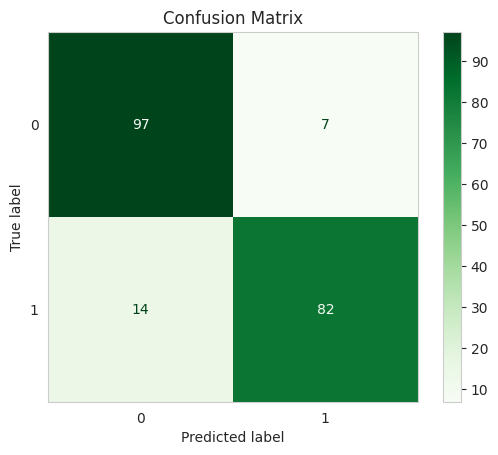


=== Stochastic Gradient Descent ===
Epoch 1: Loss = 0.2368
Epoch 2: Loss = 0.2360
Epoch 3: Loss = 0.2356
Epoch 4: Loss = 0.2354
Epoch 5: Loss = 0.2354
Epoch 6: Loss = 0.2354
Epoch 7: Loss = 0.2354
Epoch 8: Loss = 0.2354
Epoch 9: Loss = 0.2354
Epoch 10: Loss = 0.2355
Epoch 11: Loss = 0.2355
Epoch 12: Loss = 0.2355
Epoch 13: Loss = 0.2355
Epoch 14: Loss = 0.2355
Epoch 15: Loss = 0.2355
Epoch 16: Loss = 0.2355
Epoch 17: Loss = 0.2355
Epoch 18: Loss = 0.2355
Epoch 19: Loss = 0.2355
Epoch 20: Loss = 0.2355
Accuracy: 0.8900
Precision: 0.9022
Recall: 0.8646
F1 Score: 0.8830


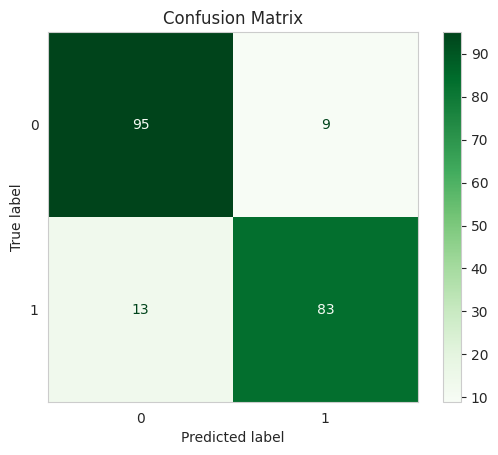


=== Mini-Batch Gradient Descent ===
Epoch 1: Loss = 0.4111
Epoch 2: Loss = 0.3358
Epoch 3: Loss = 0.3029
Epoch 4: Loss = 0.2846
Epoch 5: Loss = 0.2731
Epoch 6: Loss = 0.2654
Epoch 7: Loss = 0.2598
Epoch 8: Loss = 0.2558
Epoch 9: Loss = 0.2525
Epoch 10: Loss = 0.2500
Epoch 11: Loss = 0.2481
Epoch 12: Loss = 0.2463
Epoch 13: Loss = 0.2449
Epoch 14: Loss = 0.2438
Epoch 15: Loss = 0.2428
Epoch 16: Loss = 0.2420
Epoch 17: Loss = 0.2413
Epoch 18: Loss = 0.2409
Epoch 19: Loss = 0.2401
Epoch 20: Loss = 0.2396
Accuracy: 0.9000
Precision: 0.9222
Recall: 0.8646
F1 Score: 0.8925


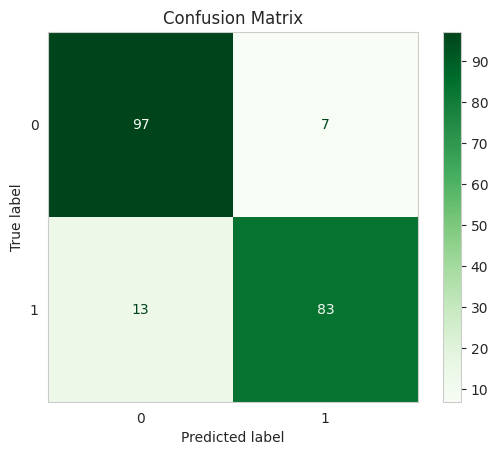

In [45]:
optimizers = {
    'Gradient Descent': 'gd',
    'Stochastic Gradient Descent': 'sgd',
    'Mini-Batch Gradient Descent': 'mbgd'
}

for name, opt in optimizers.items():
    print(f"\n=== {name} ===")
    model = LogisticRegressionFromScratch(learning_rate=0.1, epochs=20, batch_size=32)
    model.fit(X_train, y_train, optimizer=opt)
    y_pred = model.predict(X_test)
    evaluate_model(y_test, y_pred)